In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

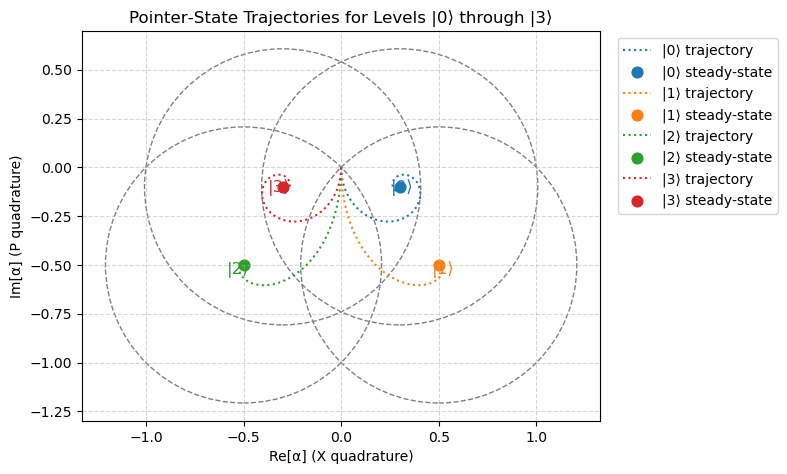

In [3]:

# --------------------------
#  PARAMETERS
# --------------------------
kappa      = 1.0        # resonator linewidth
chi_base   = 0.5        # base dispersive shift so that 2χ/κ = 1 between adjacent levels
n_levels   = 4          # levels |0> .. |3>
n_bar      = 1.0        # choose steady-state photon number = 1 for |0>
epsilon    = 0.5 * kappa * np.sqrt(n_bar)   # drive amplitude

# Time array (t from 0 to 8/κ)
t_final = 8.0 / kappa
Nt      = 2000
t_array = np.linspace(0, t_final, Nt)

# --------------------------
#  COMPUTE χ_n  AND  α_n^{ss}
# --------------------------
# χ_n = (2 n - (N-1)) * χ_base
chi_n = np.array([(2*n - (n_levels - 1)) * chi_base 
                  for n in range(n_levels)])  
# Solve for α_n^{ss}:  α_ss = -ε / ( χ_n - i κ/2 )
alpha_ss = -epsilon / (chi_n - 1j * (kappa / 2.0))

# --------------------------
#  COMPUTE TRAJECTORIES α_n(t)
# --------------------------
alpha_traj = np.zeros((n_levels, Nt), dtype=complex)
for idx in range(n_levels):
    decay_rate = (kappa / 2.0) + 1j * chi_n[idx]
    alpha_traj[idx, :] = alpha_ss[idx] * (1.0 - np.exp(-decay_rate * t_array))

# --------------------------
#  PLOT
# --------------------------
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Pointer‐State Trajectories for Levels |0⟩ through |3⟩")
ax.set_xlabel("Re[α] (X quadrature)")
ax.set_ylabel("Im[α] (P quadrature)")
ax.set_aspect('equal', 'box')
ax.grid(True, linestyle='--', alpha=0.5)

# Draw a dashed circle of radius 1/sqrt(2) around each α_n^{ss}
vacuum_radius = 1.0 / np.sqrt(2.0)
for center in alpha_ss:
    circ = Circle((center.real, center.imag), vacuum_radius,
                  edgecolor='gray', linestyle='--', facecolor='none', linewidth=1)
    ax.add_patch(circ)

# Choose 4 distinct colors from the default cycle
colors = ['C0', 'C1', 'C2', 'C3']

# Plot each trajectory and mark the steady-state point
for n in range(n_levels):
    # Dashed trajectory line
    ax.plot(alpha_traj[n].real, alpha_traj[n].imag,
            ls=':', color=colors[n], label=f"|{n}⟩ trajectory")
    # Mark the steady-state
    ax.scatter(alpha_ss[n].real, alpha_ss[n].imag,
               color=colors[n], s=60, marker='o', label=f"|{n}⟩ steady‐state")
    # Label the steady‐state location with |n> 
    ax.text(
        alpha_ss[n].real * 1.05,
        alpha_ss[n].imag * 1.05,
        f"|{n}⟩",
        color=colors[n],
        fontsize=12,
        ha='center',
        va='center'
    )

ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0))
plt.tight_layout()
plt.show()


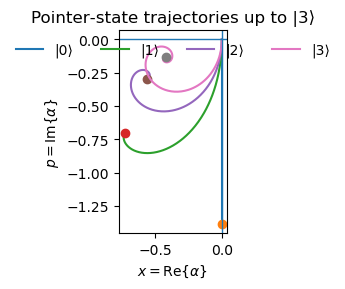

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters (all in units where ħ = 1)
kappa = 5.0                # Cavity linewidth  κ
chi_base = 2.5             # Base dispersive shift χ (so χ_j = j * χ_base)
n_bar = 2.0                # Desired steady‑state photon number for |g⟩
epsilon = 0.5 * kappa * np.sqrt(n_bar)   # Drive amplitude  ε
levels = range(4)          # j = 0,1,2,3  (|g⟩ … |3⟩)

# Time grid
t_final = 8.0 / kappa
Nt = 400
t = np.linspace(0, t_final, Nt)

# Storage for trajectories
trajectories = {}

for j in levels:
    Delta_j = -chi_base * j        # Probe on bare cavity resonance ⇒ Δ_j = -χ_j
    gamma_j = kappa / 2 - 1j * Delta_j
    alpha_ss = -1j * epsilon / gamma_j

    # Analytical solution for coherent‑state amplitude α_j(t)
    alpha_t = alpha_ss * (1 - np.exp(-gamma_j * t))
    trajectories[j] = alpha_t

# Plot
fig, ax = plt.subplots(figsize=(6, 3))
for j, alpha_t in trajectories.items():
    ax.plot(alpha_t.real, alpha_t.imag, label=f"|{j}⟩")
    # mark steady‑state with a filled marker
    ax.plot(alpha_t.real[-1], alpha_t.imag[-1], marker='o')

# Axes styling to mimic phase‑space diagram
ax.axhline(0, linewidth=1)
ax.axvline(0, linewidth=1)
ax.set_xlabel(r"$x=\mathrm{Re}\{\alpha\}$")
ax.set_ylabel(r"$p=\mathrm{Im}\{\alpha\}$")
ax.set_title("Pointer‑state trajectories up to |3⟩")
ax.set_aspect('equal', 'box')
ax.legend(loc='upper center', ncol=4, frameon=False)

plt.tight_layout()
